# Importando os dados

In [29]:
import pandas as pd
from utils.dates import Dates


data_folder = 'data/'
itens_file_name = 'tbDiligencia.csv'

itens_file_path = data_folder + itens_file_name

cols = ['idDiligencia', 'idPronac', 'idTipoDiligencia', 'DtSolicitacao', 'idSolicitante', 'DtResposta',
        'idProponente', 'stEstado', 'idPlanoDistribuicao', 'idArquivo', 'idCodigoDocumentosExigidos',
        'idProduto', 'stProrrogacao', 'stEnviado']

dt_diligencias = pd.read_csv(itens_file_path, usecols = cols, low_memory=False)
dt_diligencias.head()

,idDiligencia,idPronac,idTipoDiligencia,DtSolicitacao,idSolicitante,DtResposta,idProponente,stEstado,idPlanoDistribuicao,idArquivo,idCodigoDocumentosExigidos,idProduto,stProrrogacao,stEnviado
0,1,115502,124,2009-09-24 16:52:23,2851,2010-01-18 14:39:07,NaN,0,NaN,NaN,NaN,NaN,NaN,S
1,2,114250,124,2009-09-24 18:11:00,2825,2009-10-07 19:45:18,6010.0,0,NaN,NaN,NaN,NaN,NaN,S
2,3,115134,124,2009-09-24 18:13:00,2825,2009-10-07 16:10:21,9553.0,0,NaN,NaN,NaN,NaN,NaN,S
3,4,114399,124,2009-09-24 18:26:00,2845,2009-10-06 09:30:35,9521.0,1,NaN,NaN,NaN,NaN,NaN,S
4,5,115059,124,2009-09-24 18:35:00,2915,2009-10-02 18:01:47,11598.0,1,NaN,NaN,NaN,NaN,NaN,S


**Tabela Projetos**

In [30]:
projetos_csv_name = 'Projetos.csv'
projetos_csv = data_folder + projetos_csv_name
date_column = 'DtProtocolo'
dt_projetos = pd.read_csv(projetos_csv, usecols = ['IdPRONAC', date_column], low_memory=False)
dt_projetos[date_column] = pd.to_datetime(dt_projetos[date_column], format = Dates.DATE_INPUT_FORMAT)
dt_projetos.head()

,IdPRONAC,DtProtocolo
0,1,2008-09-12
1,2,2008-09-12
2,3,2008-09-12
3,4,2008-09-03
4,5,2008-09-12


**Números distintos de projetos com pelo menos uma diligência**

In [31]:
projects_with_diligencies = len(dt_diligencias['idPronac'].unique())
print(projects_with_diligencies)

30559


**Número total de projetos no SALIC**

In [32]:
total_projects = len(dt_projetos['IdPRONAC'].unique())
print(total_projects)

210684


**Projetos com pelo menos uma diligência Vs. total de projetos**

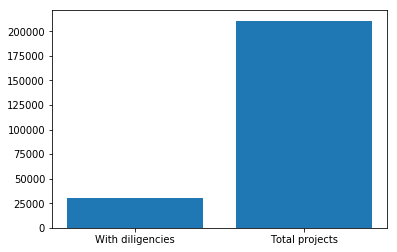

In [33]:
import matplotlib.pyplot as plt
from utils.plotter import Plotter

dd = {'With diligencies':projects_with_diligencies,
      'Total projects': total_projects}
plt.bar(dd.keys(), dd.values())
plt.show()

**Tipos distintos de diligência**

In [34]:
display(dt_diligencias['idTipoDiligencia'].unique())

array([124, 126, 181, 183, 171, 563, 564, 172, 180, 179, 174, 627])

### Adicionando data do projeto na tabela de diligências

In [35]:
dt_projetos = dt_projetos.set_index('IdPRONAC')
dt_diligencias = dt_diligencias.join(dt_projetos, on = ['idPronac'])
dt_diligencias.head()

,idDiligencia,idPronac,idTipoDiligencia,DtSolicitacao,idSolicitante,DtResposta,idProponente,stEstado,idPlanoDistribuicao,idArquivo,idCodigoDocumentosExigidos,idProduto,stProrrogacao,stEnviado,DtProtocolo
0,1,115502,124,2009-09-24 16:52:23,2851,2010-01-18 14:39:07,NaN,0,NaN,NaN,NaN,NaN,NaN,S,2009-08-06 16:27:50
1,2,114250,124,2009-09-24 18:11:00,2825,2009-10-07 19:45:18,6010.0,0,NaN,NaN,NaN,NaN,NaN,S,2009-06-29 15:22:16
2,3,115134,124,2009-09-24 18:13:00,2825,2009-10-07 16:10:21,9553.0,0,NaN,NaN,NaN,NaN,NaN,S,2009-07-27 15:44:16
3,4,114399,124,2009-09-24 18:26:00,2845,2009-10-06 09:30:35,9521.0,1,NaN,NaN,NaN,NaN,NaN,S,2009-07-02 15:15:34
4,5,115059,124,2009-09-24 18:35:00,2915,2009-10-02 18:01:47,11598.0,1,NaN,NaN,NaN,NaN,NaN,S,2009-07-23 11:43:45


# Limpando os dados

É conhecido que dados muito antigos (de 1992, por exemplo) podem ser inconsistentes, então vamos filtrar os dados a partir de uma data de início (2009).

In [52]:
from datetime import datetime

START_DATE = datetime(day=1, month=1, year=2009)

dt_projetos = dt_projetos[dt_projetos.loc[:, date_column] >= START_DATE]
dt_diligencias = dt_diligencias[dt_diligencias.loc[:, date_column] >= START_DATE]

,idDiligencia,idPronac,idTipoDiligencia,DtSolicitacao,idSolicitante,DtResposta,idProponente,stEstado,idPlanoDistribuicao,idArquivo,idCodigoDocumentosExigidos,idProduto,stProrrogacao,stEnviado,DtProtocolo
0,1,115502,124,2009-09-24 16:52:23,2851,2010-01-18 14:39:07,NaN,0,NaN,NaN,NaN,NaN,NaN,S,2009-08-06 16:27:50
1,2,114250,124,2009-09-24 18:11:00,2825,2009-10-07 19:45:18,6010.0,0,NaN,NaN,NaN,NaN,NaN,S,2009-06-29 15:22:16
2,3,115134,124,2009-09-24 18:13:00,2825,2009-10-07 16:10:21,9553.0,0,NaN,NaN,NaN,NaN,NaN,S,2009-07-27 15:44:16
3,4,114399,124,2009-09-24 18:26:00,2845,2009-10-06 09:30:35,9521.0,1,NaN,NaN,NaN,NaN,NaN,S,2009-07-02 15:15:34
4,5,115059,124,2009-09-24 18:35:00,2915,2009-10-02 18:01:47,11598.0,1,NaN,NaN,NaN,NaN,NaN,S,2009-07-23 11:43:45
5,6,115937,124,2009-09-25 12:01:00,2851,2009-11-30 10:21:48,13331.0,1,NaN,NaN,NaN,NaN,NaN,S,2009-08-21 16:51:02
6,7,114481,124,2009-09-25 13:51:00,2845,2009-10-13 10:36:41,788.0,0,NaN,NaN,NaN,NaN,NaN,S,2009-07-06 14:24:00
7,8,113860,124,2009-09-25 14:34:24,2757,2010-01-18 14:39:07,NaN,0,NaN,NaN,NaN,NaN,NaN,S,2009-06-19 10:29:28
8,9,113873,124,2009-09-25 15:08:00,2757,2009-10-05 16:57:57,2274.0,0,NaN,NaN,NaN,NaN,NaN,S,2009-06-19 15:03:37
9,10,116007,124,2009-09-25 15:19:00,2850,2009-11-04 14:36:38,1580.0,0,NaN,NaN,NaN,NaN,NaN,S,2009-08-25 11:30:17


## Repetindo o histograma de projetos com pelo menos uma diligência, a partir de 2009

In [53]:
total_projects = len(dt_projetos)
projects_with_diligencies = len(dt_diligencias['idPronac'].unique())
print(total_projects)

dd = {'With diligencies':projects_with_diligencies,
      'Total projects': total_projects}
plt.bar(dd.keys(), dd.values())
plt.show()

KeyError: 'IdPRONAC'